# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
df = pd.read_csv(r'sales_data.csv')

In [3]:
df

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0
...,...,...,...,...,...,...
364,2022-12-27,Watch,Accessories,150.0,5.0,750.0
365,2022-12-28,Coat,Clothing,100.0,5.0,500.0
366,2022-12-29,Headphones,Electronics,100.0,10.0,1000.0
367,2022-12-30,Smartphone,Electronics,600.0,11.0,6600.0


# Data Exploration, Cleaning, and Wrangling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      369 non-null    object 
 1   product   369 non-null    object 
 2   category  369 non-null    object 
 3   price     367 non-null    float64
 4   quantity  368 non-null    float64
 5   revenue   368 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.4+ KB


In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      369 non-null    datetime64[ns]
 1   product   369 non-null    object        
 2   category  369 non-null    object        
 3   price     367 non-null    float64       
 4   quantity  368 non-null    float64       
 5   revenue   368 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 17.4+ KB


In [7]:
df.isnull().sum()

date        0
product     0
category    0
price       2
quantity    1
revenue     1
dtype: int64

In [8]:
df.dropna()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0
...,...,...,...,...,...,...
364,2022-12-27,Watch,Accessories,150.0,5.0,750.0
365,2022-12-28,Coat,Clothing,100.0,5.0,500.0
366,2022-12-29,Headphones,Electronics,100.0,10.0,1000.0
367,2022-12-30,Smartphone,Electronics,600.0,11.0,6600.0


In [9]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0
...,...,...,...,...,...,...
364,2022-12-27,Watch,Accessories,150.0,5.0,750.0
365,2022-12-28,Coat,Clothing,100.0,5.0,500.0
366,2022-12-29,Headphones,Electronics,100.0,10.0,1000.0
367,2022-12-30,Smartphone,Electronics,600.0,11.0,6600.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      369 non-null    datetime64[ns]
 1   product   369 non-null    object        
 2   category  369 non-null    object        
 3   price     367 non-null    float64       
 4   quantity  368 non-null    float64       
 5   revenue   368 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 17.4+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,367.0,211.226158,227.33517,20.0,50.0,100.0,300.0,1200.0
quantity,368.0,14.565217,8.59574,3.0,8.0,12.0,20.0,50.0
revenue,368.0,2060.679348,1910.93079,300.0,800.0,1200.0,2400.0,7200.0


# Data Analysis

### 1. What was the total revenue generated by the company over the course of the year?

In [13]:
total_revenue = df['revenue'].sum()
print(f"Total revenue generated by the company: ${total_revenue:.2f}")

Total revenue generated by the company: $758330.00


### 2. Which product had the highest revenue? How much revenue did it generate?

In [14]:
product_highest_revenue = df[df['revenue'] == df['revenue'].max()]['product'].values[0]
highest_revenue = df['revenue'].max()
print(f"The product with the highest revenue is {product_highest_revenue} with revenue of ${highest_revenue:.2f}")

The product with the highest revenue is Smartphone with revenue of $7200.00


### 3. What was the average price of a product sold by the company?


In [15]:
average_price = df['price'].mean()
print(f"The average price of a product sold is ${average_price:.2f}")

The average price of a product sold is $211.23


### 4. What was the total quantity of products sold by the company?


In [16]:
total_quantity = df['quantity'].sum()
print(f"The total quantity of products sold is {total_quantity:.0f}")

The total quantity of products sold is 5360


### 5. Which category had the highest revenue? How much revenue did it generate?


In [17]:
category_highest_revenue = df.groupby('category')['revenue'].sum().idxmax()
highest_category_revenue = df.groupby('category')['revenue'].sum().max()
print(f"The category with the highest revenue is {category_highest_revenue} with revenue of ${highest_category_revenue:.2f}")

The category with the highest revenue is Electronics with revenue of $516080.00


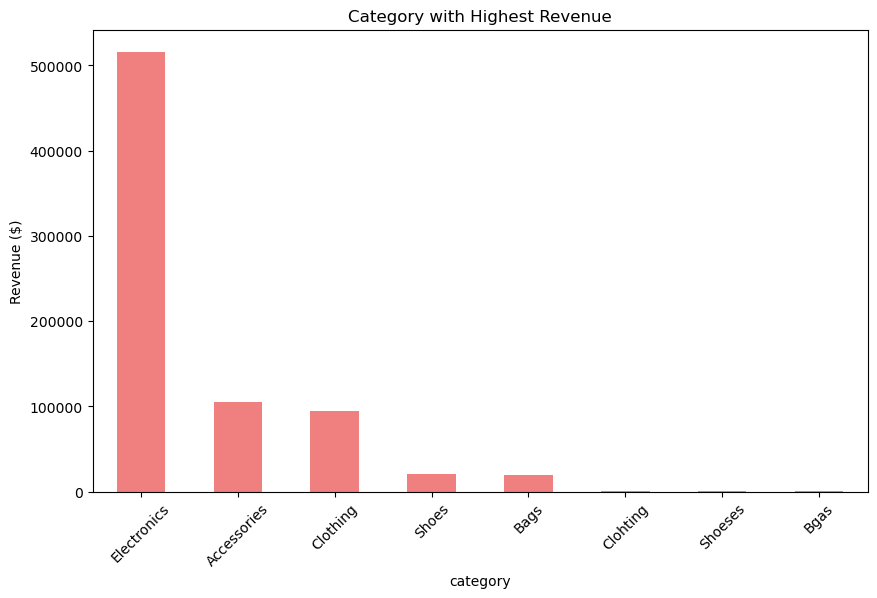

In [18]:
category_revenue = df.groupby('category')['revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.title('Category with Highest Revenue')
category_revenue.plot(kind='bar', color='lightcoral')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.show()


### 6. What was the average revenue per sale?


In [19]:
average_revenue_per_sale = df['revenue'].mean()
print(f"The average revenue per sale is ${average_revenue_per_sale:.2f}")

The average revenue per sale is $2060.68


### 7. What was the total revenue generated in each quarter of the year? (i.e. Q1, Q2, Q3, Q4)

In [20]:
df['quarter'] = df['date'].dt.quarter
quarterly_revenue = df.groupby('quarter')['revenue'].sum()
print("Total revenue generated in each quarter of the year:")
print(quarterly_revenue)

Total revenue generated in each quarter of the year:
quarter
1    182100.0
2    183970.0
3    197680.0
4    194580.0
Name: revenue, dtype: float64


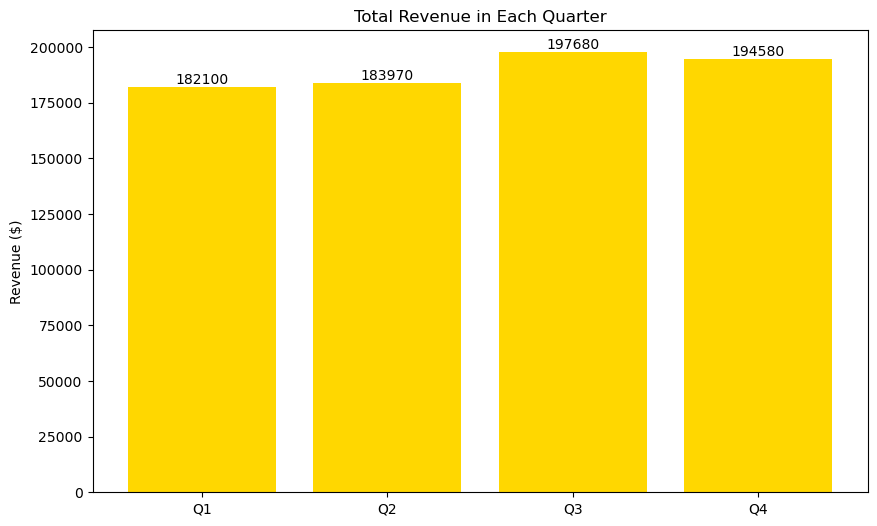

In [22]:
quarterly_revenue = df.groupby('quarter')['revenue'].sum()
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
plt.figure(figsize=(10, 6))
plt.title('Total Revenue in Each Quarter')
bars = plt.bar(quarters, quarterly_revenue, color='gold')
plt.ylabel('Revenue ($)')

# Add the revenue values on top of the bars
for bar, revenue in zip(bars, quarterly_revenue):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(revenue)), ha='center', va='bottom')

plt.show()
